In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Path to the directory containing the CSV files
csv_directory = r'C:\Users\rdobe\OneDrive\Documents\Stack Overflow'

# Dictionary to store DataFrames
dataframes = {}

# List all CSV files in the directory
csv_files = os.listdir(csv_directory)

# Iterate through each CSV file and load into a DataFrame
for csv_file in csv_files:
    # Check if the file is a CSV file
    if csv_file.endswith('.csv'):
        # Construct the full path to the CSV file
        csv_path = os.path.join(csv_directory, csv_file)
        
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        
        # Store DataFrame in the dictionary with filename as key
        dataframes[csv_file] = df

In [3]:
#give each file a df name

filename_to_access = 'survey_results_public_2019.csv'

if filename_to_access in dataframes:
    df_19 = dataframes[filename_to_access]

filename_to_access = 'survey_results_public_2020.csv'

if filename_to_access in dataframes:
    df_20 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2021.csv'

if filename_to_access in dataframes:
    df_21 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2022.csv'

if filename_to_access in dataframes:
    df_22 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2023.csv'

if filename_to_access in dataframes:
    df_23 = dataframes[filename_to_access]

In [4]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)

# Display the DataFrame
df_23.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

We will look at education relevant categories throughout the years and see which data we can take to study periodically. The focus here will be on these two questions:

* **1. How do people learn coding?**
* **2. Is there correlation between education and integration into job market? How does this change over time?**

2019:
* ConvertedComp
* EdLevel
* **EduOther**
* MainBranch (to check level of coding)
* DevType
* Hobbyist
* YearsCode
* Age1stCode
* CodeRev
* UndergradMajor

2020: 
* MainBranch
* Hobbyist
* Age1stCode
* DevType
* EdLevel
* UndergradMajor
* NEWEdImpt

2021: 
* MainBranch
* CodingActivities
* EdLevel
* Age1stCode
* **LearnCode**
* YearsCode
* DevType

2022:
* MainBranch
* EdLevel
* CodingActivities 
* **LearnCode**
* YearsCode
* LearnCodeOnline
* DevType
* WorkExp

2023:
* MainBranch
* CodingActivities
* EdLevel
* **LearnCode**
* LearnCodeOnline
* YearsCode
* DevType
* WorkExp

___

**1. How do people learn coding?**

Since I want to study how people study code, we're looking for data that extends over 5 years. The best variable is **LearnCode**, but it was introduced only from survey 2021. So we will check the trend for this 3 year period from 2021 - 2023.
___


In [5]:
#Clean all data from NaN values
df_21 = df_21.dropna(subset=['LearnCode'])
df_22 = df_22.dropna(subset=['LearnCode'])
df_23 = df_23.dropna(subset=['LearnCode'])

In [6]:
def process_dataframe(df, year):
    # Split values in the 'DatabaseWorkedWith' column by semicolon and expand them into separate columns
    df_split = df['LearnCode'].str.split(';', expand=True)

    # Combine all values into a single Series and stack them
    df_combined_values = df_split.stack()

    # Get value counts of the combined Series and convert it to a DataFrame
    df_value_counts = df_combined_values.value_counts().reset_index()

    # Rename columns
    df_value_counts.columns = ['LearnCode', str(year)]

    # Apply simple feature scaling
    df_value_counts[str(year)] = df_value_counts[str(year)] / df_value_counts[str(year)].max()
    
    return df_value_counts

# Assuming df_21, df_22, and df_23 are already loaded and ready
df_21_processed = process_dataframe(df_21, 2021)
df_22_processed = process_dataframe(df_22, 2022)
df_23_processed = process_dataframe(df_23, 2023)

df_21_processed

,LearnCode,2021
0,"Other online resources (ex: videos, blogs, etc)",1.000000
1,School,0.900186
2,Books / Physical media,0.865565
3,Online Courses or Certification,0.678470
4,Online Forum,0.531037
5,Friend or family member,0.306973
6,Colleague,0.288002
7,Coding Bootcamp,0.172012
8,Other (please specify):,0.140185


In [7]:
#clean up some answers
df_21_processed.loc[1, 'LearnCode'] = 'School (i.e., University, College, etc)'
df_21_processed.loc[4, 'LearnCode'] = 'On the job training'

In [8]:
df_22_processed.loc[0, 'LearnCode'] = 'Other online resources (ex: videos, blogs, etc)'

In [9]:
df_23_processed.loc[0, 'LearnCode'] = 'Other online resources (ex: videos, blogs, etc)'

In [10]:
from functools import reduce

# Assuming dataframes is a list containing your dataframes for each year
dataframes = [df_21_processed, df_22_processed, df_23_processed]

# Merge all dataframes in the list
merged_df_21_22_23 = reduce(lambda left, right: pd.merge(left, right, on='LearnCode', how='outer'), dataframes)

# Optionally, you can fill NaN values with 0
merged_df_21_22_23.fillna(0, inplace=True)

# Now merged_df contains the merged data from all dataframes, including platforms that may not appear in every year
merged_df_21_22_23

,LearnCode,2021,2022,2023
0,"Other online resources (ex: videos, blogs, etc)",1.000000,1.000000,1.000000
1,"School (i.e., University, College, etc)",0.900186,0.876862,0.625776
2,Books / Physical media,0.865565,0.768264,0.646404
3,Online Courses or Certification,0.678470,0.657637,0.615013
4,On the job training,0.531037,0.561963,0.574853
5,Friend or family member,0.306973,0.196765,0.141450
6,Colleague,0.288002,0.259831,0.292167
7,Coding Bootcamp,0.172012,0.152317,0.122459
8,Other (please specify):,0.140185,0.070100,0.077601
9,Hackathons (virtual or in-person),0.000000,0.103810,0.100122


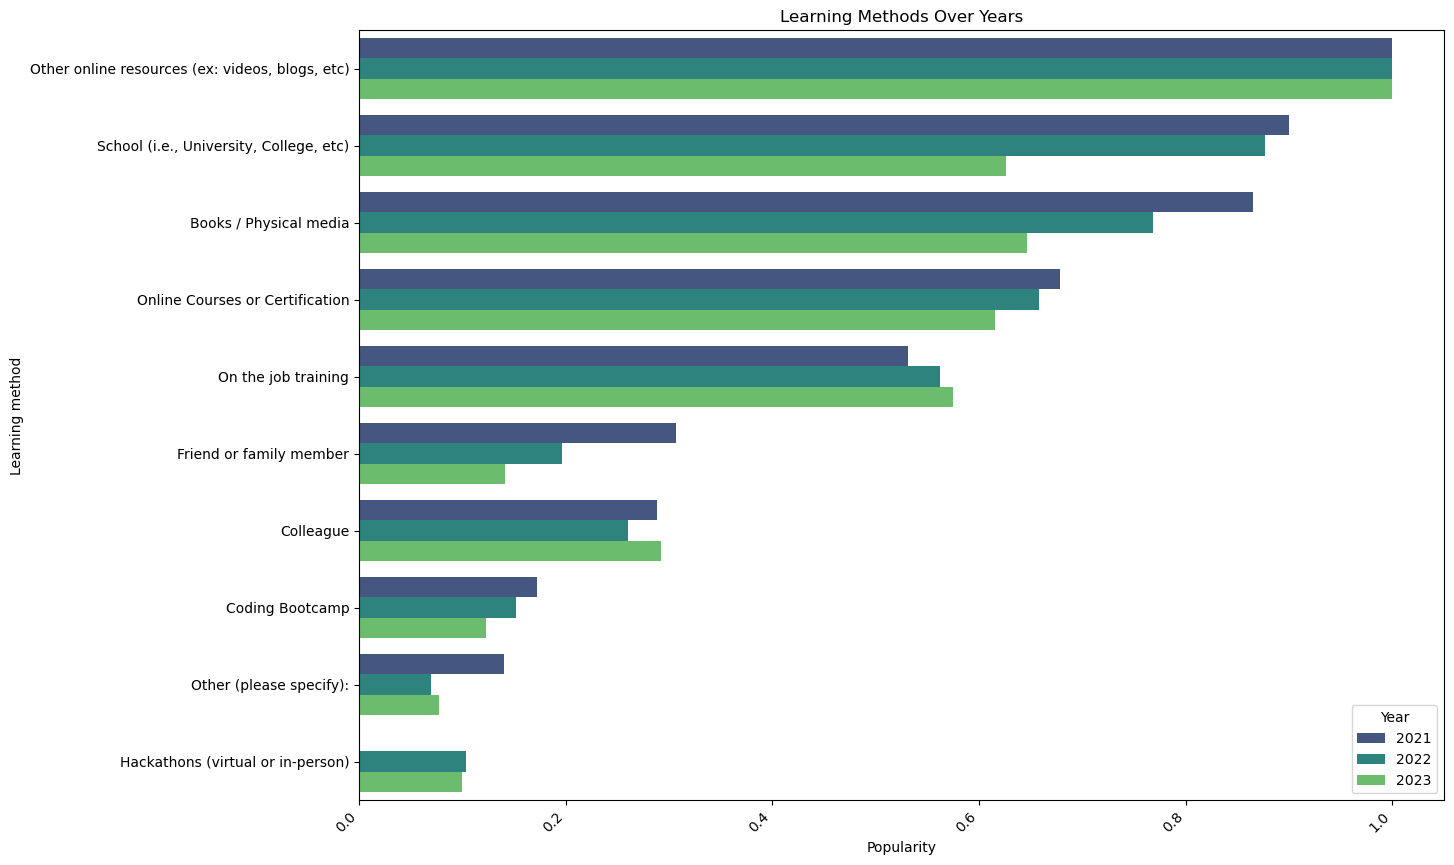

In [13]:
# Melt the DataFrame to have a single column for the years
df_melted = merged_df_21_22_23.melt(id_vars='LearnCode', var_name='Year', value_name='Value')

# Create a bar plot with gradient colors
plt.figure(figsize=(14, 10))
sns.barplot(data=df_melted, y='LearnCode', x='Value', hue='Year', palette='viridis')

# Set labels and title
plt.title('Learning Methods Over Years')
plt.xlabel('Popularity')
plt.ylabel('Learning method')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
#plt.tight_layout()
plt.show()

___
**Key insights** (The x-axis represents "Popularity" on a scale of 0 to 1):

* Other online resources (e.g., videos, blogs, etc.) is the most popular learning method throughout the years, with a steady increase in popularity.
* School (i.e., University, College, etc.) and Books/Physical media ranks high, but is decreasing dramaticaly in popularity
* Online Courses or Certification is also popular, showing a small decline.
* Learning methods such as On the job training, and Colleague show relatively less popularitycompared to other, but show increase in popularity in recent years.
* Coding Bootcamps had a spike in 2022 but seem to have declined slightly in 2023.
* Other methods are the least popular and show some slight decreases.
___
**Implications:**

* If the trend is to continue, coding will be mastered using online methods, which is reasonable given the nature of this competency.
* Formal education and physical media is perhaps not as strict requirement to learn code anymore as it used to be.
* A positive trend is that human competency to teach code increases in popularity, mostly in work environment.

___
**2. Is there a correlation between education and integration into job market? How does this change over time?**

We'll check education level and compare it to employment and see how that unfolds over time.
<br> (could also be interesting to see correlation between DevType and EdLevel)
___


In [ ]:
# Filter data on MainBranch, EdLevel, and Employment

In [14]:
df_19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [15]:
df_19['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: count, dtype: int64

In [16]:
# filtering out 'I am a student who is learning to code' and 'I code primarily as a hobby' 
# since these are not directly related to job market

values_to_remove = ['I am a student who is learning to code', 'I code primarily as a hobby']
df_19_mainbranch_filtered = df_19[~df_19['MainBranch'].isin(values_to_remove)]

df_19_mainbranch_filtered['MainBranch'].value_counts()


MainBranch
I am a developer by profession                                                   65679
I am not primarily a developer, but I write code sometimes as part of my work     7539
I used to be a developer by profession, but no longer am                          1584
Name: count, dtype: int64

In [17]:
df_19_mainbranch_filtered['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              35971
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           18748
Some college/university study without earning a degree                                 8430
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3855
Associate degree                                                                       2468
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2339
Professional degree (JD, MD, etc.)                                                     1077
Primary/elementary school                                                               433
I never completed any formal education                                                  388
Name: count, dtype: int64

In [18]:
df_19_mainbranch_filtered['Employment'].value_counts()

Employment
Employed full-time                                      62515
Independent contractor, freelancer, or self-employed     7156
Employed part-time                                       2859
Not employed, but looking for work                       1667
Not employed, and not looking for work                    382
Retired                                                   251
Name: count, dtype: int64

In [19]:
# filtering out 'Not employed, and not looking for work' and 'Retired' 

values_to_remove = ['Not employed, and not looking for work', 'Retired']
df_19_emp_filtered = df_19_mainbranch_filtered[~df_19_mainbranch_filtered['Employment'].isin(values_to_remove)]

df_19_emp_filtered['Employment'].value_counts()


Employment
Employed full-time                                      62515
Independent contractor, freelancer, or self-employed     7156
Employed part-time                                       2859
Not employed, but looking for work                       1667
Name: count, dtype: int64

In [20]:
# Removing NaN values
df_19_clean = df_19_emp_filtered[['EdLevel', 'Employment']].dropna()

#changing values to match with other surveys
df_19_clean['EdLevel'] = df_19_clean['EdLevel'].replace('Associate degree', 'Associate degree (A.A., A.S., etc.)')
df_19_clean['EdLevel'] = df_19_clean['EdLevel'].replace('Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')
df_19_clean['EdLevel'] = df_19_clean['EdLevel'].replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)')
df_19_clean['EdLevel'] = df_19_clean['EdLevel'].replace('Other doctoral degree (Ph.D, Ed.D., etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)')

df_19_clean.head()


,EdLevel,Employment
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em..."


In [21]:
# Define 'employed' status
employed_statuses = [
    'Employed full-time', 
    'Employed part-time',
    'Independent contractor, freelancer, or self-employed'
]

# Create a new column for counting employed individuals
df_19_clean['IsEmployed'] = df_19_clean['Employment'].isin(employed_statuses)

# Group by 'EdLevel' and calculate the total count and employment count for each level
edlevel_group_19 = df_19_clean.groupby('EdLevel')['IsEmployed']
employment_rates_19 = edlevel_group_19.sum() / edlevel_group_19.size() * 100

employment_rates_19_df_sorted = employment_rates_19.to_frame(name='Employment Rate 2019').reset_index()

employment_rates_19_df_sorted = employment_rates_19_df_sorted.sort_values(by='Employment Rate 2019')
employment_rates_19_df_sorted = employment_rates_19_df_sorted.set_index('EdLevel')

employment_rates_19_df_sorted

,Employment Rate 2019
EdLevel,
Primary/elementary school,94.132029
I never completed any formal education,95.867769
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",96.542553
"Associate degree (A.A., A.S., etc.)",96.826051
Some college/university study without earning a degree,97.113875
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",97.930531
"Other doctoral degree (Ph.D., Ed.D., etc.)",98.119808
"Professional degree (JD, MD, etc.)",98.282443
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",98.326676


<Figure size 1200x800 with 0 Axes>

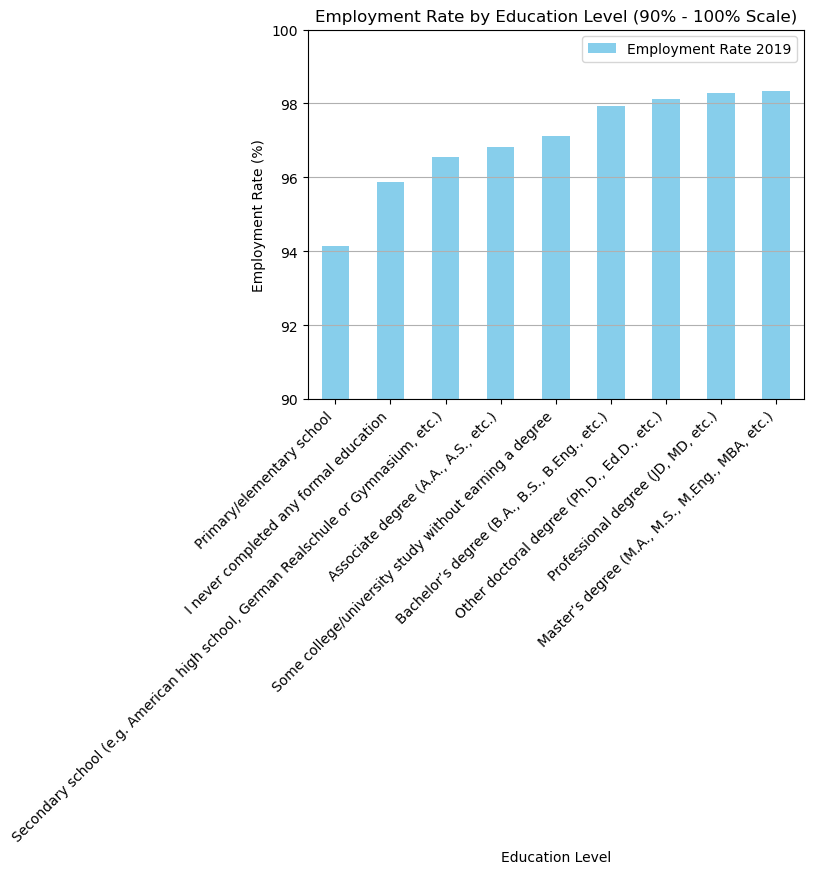

In [22]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
employment_rates_19_df_sorted.plot(kind='bar', color='skyblue')

# Set the y-axis to start from 90% and end at 100% to zoom in on the differences
plt.ylim(90, 100)

plt.title('Employment Rate by Education Level (90% - 100% Scale)')
plt.xlabel('Education Level')
plt.ylabel('Employment Rate (%)')
plt.xticks(rotation=45, ha='right')

# Optional: Add grid lines for better readability of the differences
plt.grid(axis='y')

#plt.tight_layout()
plt.show()

___
We have this information in all 5 years of survey, so this will be interesting to compare over years
___

### 2020

In [23]:
df_20['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: count, dtype: int64

In [24]:
values_to_remove = ['I am a student who is learning to code', 'I code primarily as a hobby']
df_20_mainbranch_filtered = df_20[~df_20['MainBranch'].isin(values_to_remove)]

df_20_mainbranch_filtered['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   47193
I am not primarily a developer, but I write code sometimes as part of my work     5502
I used to be a developer by profession, but no longer am                          1183
Name: count, dtype: int64

In [25]:
df_20_mainbranch_filtered['Employment'].value_counts()

Employment
Employed full-time                                      44139
Independent contractor, freelancer, or self-employed     5169
Employed part-time                                       1697
Not employed, but looking for work                       1228
Student                                                  1216
Retired                                                   167
Not employed, and not looking for work                    143
Name: count, dtype: int64

In [26]:
values_to_remove = ['Not employed, and not looking for work', 'Retired', 'Student']
df_20_emp_filtered = df_20_mainbranch_filtered[~df_20_mainbranch_filtered['Employment'].isin(values_to_remove)]

df_20_emp_filtered['Employment'].value_counts()

Employment
Employed full-time                                      44139
Independent contractor, freelancer, or self-employed     5169
Employed part-time                                       1697
Not employed, but looking for work                       1228
Name: count, dtype: int64

In [27]:
df_20_clean = df_20_emp_filtered[['EdLevel', 'Employment']].dropna()

df_20_clean.head()

,EdLevel,Employment
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em..."
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
5,"Secondary school (e.g. American high school, G...",Employed full-time
6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time


### 2021

In [28]:
df_21['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   57865
I am a student who is learning to code                                           11954
I am not primarily a developer, but I write code sometimes as part of my work     6539
I code primarily as a hobby                                                       4895
I used to be a developer by profession, but no longer am                          1233
None of these                                                                      477
Name: count, dtype: int64

In [29]:
values_to_remove = ['I am a student who is learning to code', 'I code primarily as a hobby', 'None of these']
df_21_mainbranch_filtered = df_21[~df_21['MainBranch'].isin(values_to_remove)]

df_21_mainbranch_filtered['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   57865
I am not primarily a developer, but I write code sometimes as part of my work     6539
I used to be a developer by profession, but no longer am                          1233
Name: count, dtype: int64

In [30]:
df_21_mainbranch_filtered['Employment'].value_counts()

Employment
Employed full-time                                      52099
Independent contractor, freelancer, or self-employed     7297
Employed part-time                                       1930
Student, full-time                                       1784
Not employed, but looking for work                       1253
Student, part-time                                        572
Not employed, and not looking for work                    242
I prefer not to say                                       223
Retired                                                   193
Name: count, dtype: int64

In [31]:
values_to_remove = ['Not employed, and not looking for work', 'Retired', 'Student, full-time', 'Student, part-time', 'I prefer not to say']
df_21_emp_filtered = df_21_mainbranch_filtered[~df_21_mainbranch_filtered['Employment'].isin(values_to_remove)]

df_21_emp_filtered['Employment'].value_counts()

Employment
Employed full-time                                      52099
Independent contractor, freelancer, or self-employed     7297
Employed part-time                                       1930
Not employed, but looking for work                       1253
Name: count, dtype: int64

In [32]:
df_21_clean = df_21_emp_filtered[['EdLevel', 'Employment']].dropna()

df_21_clean['EdLevel'] = df_21_clean['EdLevel'].replace('Something else','I never completed any formal education')

df_21_clean.head()

,EdLevel,Employment
0,"Secondary school (e.g. American high school, G...","Independent contractor, freelancer, or self-em..."
4,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em..."
8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed part-time
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time


### 2022

In [33]:
df_22['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   53394
I am learning to code                                                             6278
I am not primarily a developer, but I write code sometimes as part of my work     5777
I code primarily as a hobby                                                       4838
I used to be a developer by profession, but no longer am                          1293
Name: count, dtype: int64

In [34]:
values_to_remove = ['I am learning to code', 'I code primarily as a hobby', 'None of these']
df_22_mainbranch_filtered = df_22[~df_22['MainBranch'].isin(values_to_remove)]

df_22_mainbranch_filtered['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                   53394
I am not primarily a developer, but I write code sometimes as part of my work     5777
I used to be a developer by profession, but no longer am                          1293
Name: count, dtype: int64

In [35]:
df_22_mainbranch_filtered['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                             41979
Independent contractor, freelancer, or self-employed                                                                                                                                                             4635
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         3453
Student, full-time                                                                                                                                                                                               1723
Employed, part-time                                                                                                                  

In [36]:
# Expand the 'Employment' entries while duplicating 'EdLevel' for each one
expanded_rows = df_22_mainbranch_filtered['Employment'].str.split(';').explode().reset_index()
expanded_rows['EdLevel'] = df_22_mainbranch_filtered.loc[expanded_rows['index'], 'EdLevel'].values

# Now, 'expanded_rows' has a row for each employment type with the associated 'EdLevel'
# You can drop the 'index' column as it's no longer needed
expanded_rows.drop('index', axis=1, inplace=True)

# filter out unwanted employment types as before
values_to_remove = ['Not employed, and not looking for work', 'Retired', 'Student, full-time', 'Student, part-time', 'I prefer not to say']
df_22_emp_filtered = expanded_rows[~expanded_rows['Employment'].isin(values_to_remove)]

# Final cleanup, if you need to remove any rows with missing 'EdLevel' or 'Employment'
df_22_clean = df_22_emp_filtered.dropna(subset=['EdLevel', 'Employment']).reset_index(drop=True)

# Modifying 'Employment' values
df_22_clean['Employment'] = df_22_clean['Employment'].replace('Employed, full-time', 'Employed full-time')
df_22_clean['Employment'] = df_22_clean['Employment'].replace('Employed, part-time', 'Employed part-time')

df_22_clean['EdLevel'] = df_22_clean['EdLevel'].replace('Something else','I never completed any formal education')

#Swap the columns
df_22_clean = df_22_clean[['EdLevel', 'Employment']]

df_22_clean['Employment'].value_counts()

Employment
Employed full-time                                      47997
Independent contractor, freelancer, or self-employed     9866
Employed part-time                                       3597
Not employed, but looking for work                       1533
Name: count, dtype: int64

### 2023

In [37]:
df_23['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           66992
I am not primarily a developer, but I write code sometimes as part of my work/studies     8929
I am learning to code                                                                     4947
I code primarily as a hobby                                                               4938
I used to be a developer by profession, but no longer am                                  1857
Name: count, dtype: int64

In [38]:
values_to_remove = ['I am learning to code', 'I code primarily as a hobby', 'None of these']
df_23_mainbranch_filtered = df_23[~df_23['MainBranch'].isin(values_to_remove)]

df_23_mainbranch_filtered['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           66992
I am not primarily a developer, but I write code sometimes as part of my work/studies     8929
I used to be a developer by profession, but no longer am                                  1857
Name: count, dtype: int64

In [39]:
df_23_mainbranch_filtered['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                             52633
Independent contractor, freelancer, or self-employed                                                                                                                                                             6729
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4299
Student, full-time                                                                                                                                                                                               2965
Not employed, but looking for work                                                                                                   

In [40]:
expanded_rows = df_23_mainbranch_filtered['Employment'].str.split(';').explode().reset_index()
expanded_rows['EdLevel'] = df_23_mainbranch_filtered.loc[expanded_rows['index'], 'EdLevel'].values

expanded_rows.drop('index', axis=1, inplace=True)

values_to_remove = ['Not employed, and not looking for work', 'Retired', 'Student, full-time', 'Student, part-time', 'I prefer not to say']
df_23_emp_filtered = expanded_rows[~expanded_rows['Employment'].isin(values_to_remove)]

df_23_clean = df_23_emp_filtered.dropna(subset=['Employment', 'EdLevel']).reset_index(drop=True)

# Modifying 'Employment' values
df_23_clean['Employment'] = df_23_clean['Employment'].replace('Employed, full-time', 'Employed full-time')
df_23_clean['Employment'] = df_23_clean['Employment'].replace('Employed, part-time', 'Employed part-time')

df_23_clean['EdLevel'] = df_23_clean['EdLevel'].replace('Professional degree (JD, MD, Ph.D, Ed.D, etc.)','Other doctoral degree (Ph.D., Ed.D., etc.)')
df_23_clean['EdLevel'] = df_23_clean['EdLevel'].replace('Something else','I never completed any formal education')

#Swap the columns
df_23_clean = df_23_clean[['EdLevel', 'Employment']]

df_23_clean['Employment'].value_counts()

Employment
Employed full-time                                      59591
Independent contractor, freelancer, or self-employed    13205
Employed part-time                                       4486
Not employed, but looking for work                       2622
Name: count, dtype: int64

In [41]:
#combine the results

def calculate_employment_rate(df, employed_statuses):
    # Create a new column for counting employed individuals
    df['IsEmployed'] = df['Employment'].isin(employed_statuses)

    # Group by 'EdLevel' and calculate the total count and employment count for each level
    edlevel_group = df.groupby('EdLevel')['IsEmployed']
    employment_rates = edlevel_group.sum() / edlevel_group.size() * 100

    # Convert the Series to DataFrame
    employment_rates_df = employment_rates.to_frame().reset_index()

    # Sort the DataFrame by the employment rate
    employment_rates_df_sorted = employment_rates_df.sort_values(by=employment_rates.name)
    
    return employment_rates_df_sorted.set_index('EdLevel')

# Define 'employed' statuses
employed_statuses = [
    'Employed full-time', 
    'Employed part-time',
    'Independent contractor, freelancer, or self-employed'
]

# Initialize an empty DataFrame for concatenation
all_years_employment_rate = pd.DataFrame()

# Iterate over each year and DataFrame
for year, df in zip(range(2019, 2024), [df_19_clean, df_20_clean, df_21_clean, df_22_clean, df_23_clean]):
    # Calculate employment rate for the year
    employment_rate_year = calculate_employment_rate(df, employed_statuses)
    
    # Rename the employment rate column to reflect the year
    employment_rate_year.columns = [f'Employment Rate {year}']
    
    # If it's the first year, initialize the DataFrame
    if all_years_employment_rate.empty:
        all_years_employment_rate = employment_rate_year
    else:
        # For subsequent years, join the new data on 'EdLevel', aligning on index
        all_years_employment_rate = all_years_employment_rate.join(employment_rate_year, how='outer')

# Optionally, fill NaN values with 0 or another placeholder to indicate no data
#all_years_employment_rate.fillna(0, inplace=True)

# Choose the year you want to sort by, for example 'Employment Rate 2023'
sort_by_year = 'Employment Rate 2019'

# Sort the DataFrame by this year's employment rate in ascending order
all_years_employment_rate_sorted = all_years_employment_rate.sort_values(by=sort_by_year, ascending=False)

# If you need to reset the index to turn 'EdLevel' back into a column you can do the following
all_years_employment_rate_sorted.reset_index(inplace=True)

all_years_employment_rate_sorted


,EdLevel,Employment Rate 2019,Employment Rate 2020,Employment Rate 2021,Employment Rate 2022,Employment Rate 2023
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",98.326676,98.445681,98.668750,98.611733,97.994448
1,"Professional degree (JD, MD, etc.)",98.282443,98.265896,98.311445,96.596136,NaN
2,"Other doctoral degree (Ph.D., Ed.D., etc.)",98.119808,98.724490,98.661485,98.928738,97.935720
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",97.930531,97.811685,97.932825,97.589869,96.826010
4,Some college/university study without earning ...,97.113875,96.397561,97.229766,96.770900,95.306222
5,"Associate degree (A.A., A.S., etc.)",96.826051,97.051114,97.598628,97.020029,95.387524
6,"Secondary school (e.g. American high school, G...",96.542553,96.451774,97.219251,95.131291,94.062019
7,I never completed any formal education,95.867769,94.171779,96.000000,94.212651,94.994995
8,Primary/elementary school,94.132029,91.463415,96.235294,97.239915,90.484740


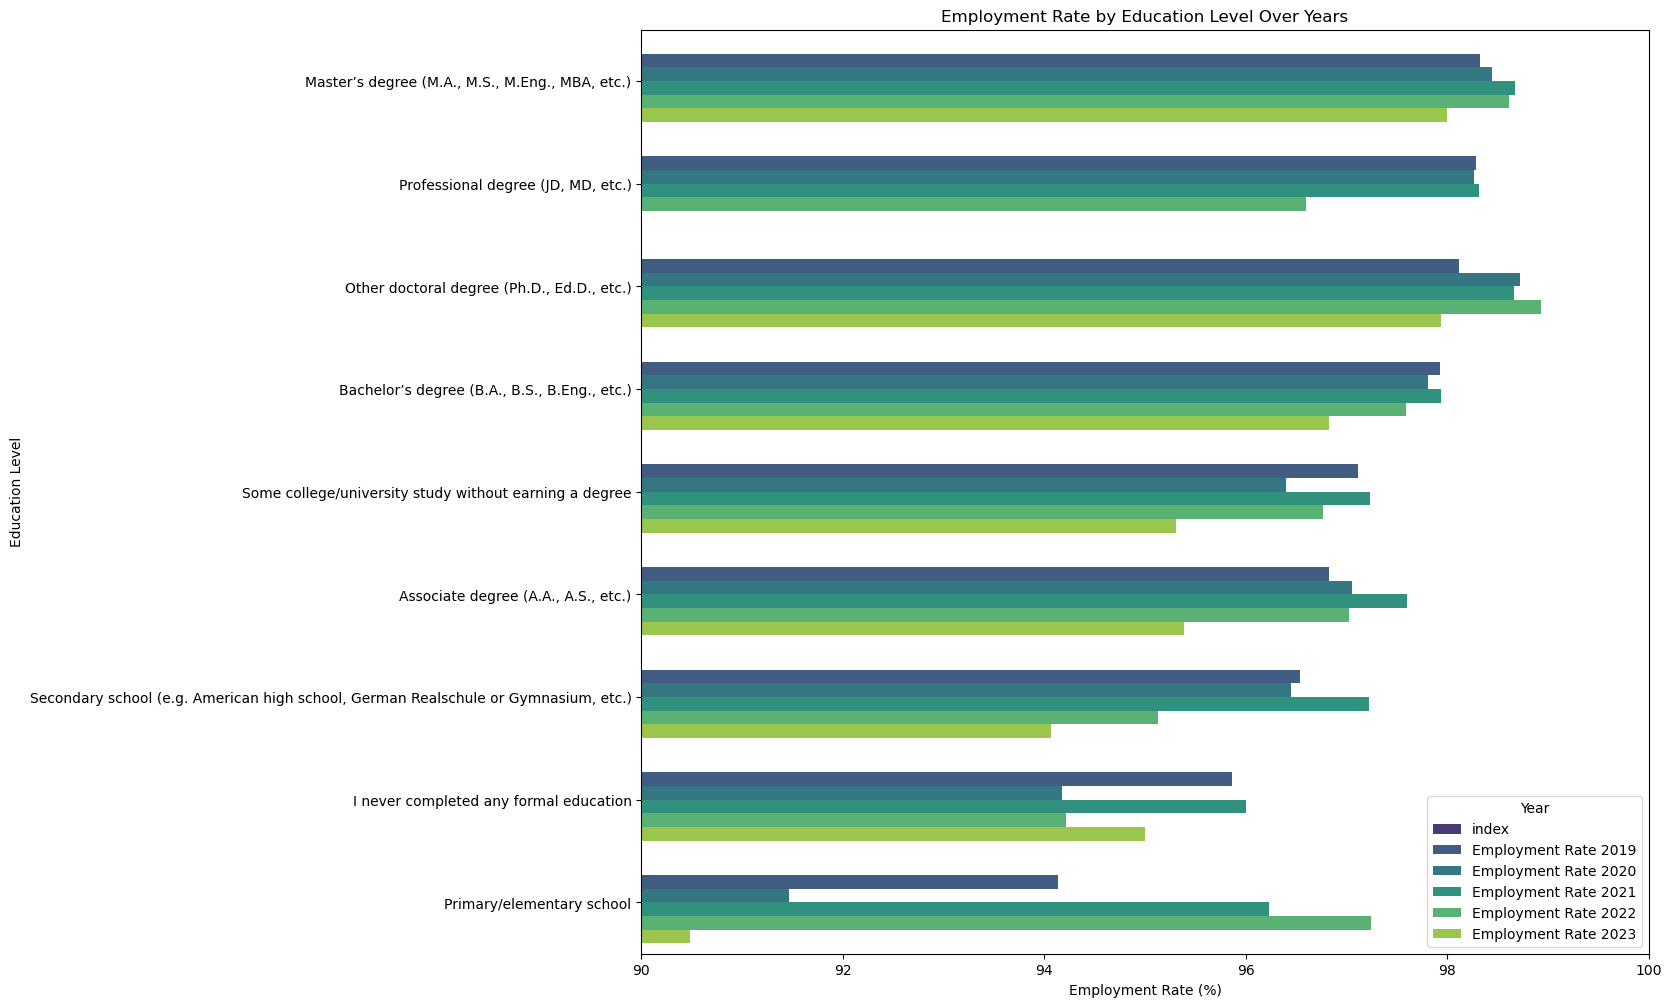

In [43]:
# Reset the index of the DataFrame so 'EdLevel' becomes a column
df_reset = all_years_employment_rate_sorted.reset_index()

# Now, use melt on the reset DataFrame
df_emp_melted = df_reset.melt(id_vars='EdLevel', var_name='Year', value_name='Value')

# Create a bar plot with gradient colors
plt.figure(figsize=(13, 12))
sns.barplot(data=df_emp_melted, y='EdLevel', x='Value', hue='Year', palette='viridis')

# Set the y-axis to start from 90% and end at 100% to zoom in on the differences
plt.xlim(90, 100)

# Set labels and title
plt.title('Employment Rate by Education Level Over Years')
plt.xlabel('Employment Rate (%)')
plt.ylabel('Education Level')

# Show plot
plt.show()


___
Before we jump in analysis mode, I will get the general employment rate from year to year as a reference
___

In [44]:
#minor clean-ups in 'Employment' values

# Use .loc[] to avoid SettingWithCopyWarning when replacing values
df_22_clean.loc[:, 'Employment'] = df_22_clean['Employment'].replace({
    'Employed, full-time': 'Employed full-time',
    'Employed, part-time': 'Employed part-time'
})

df_22_clean.loc[:, 'Employment'] = df_23_clean['Employment'].replace({
    'Employed, full-time': 'Employed full-time',
    'Employed, part-time': 'Employed part-time'
})


In [45]:
# Given the structure of df_22_emp_filtered and assuming similar structures for the other years' DataFrames,
# we can write a function to automate the process of calculating the total employment rate for each.

def calculate_total_employment_rate(df):
    total_respondents = len(df)
    total_employed = df['IsEmployed'].sum()
    employment_rate = (total_employed / total_respondents) * 100
    return employment_rate

# Now, we will automate this for each DataFrame from 2019 to 2023
# First, we assume that the dataframes for each year are named accordingly:
# df_19_emp_filtered, df_20_emp_filtered, df_21_emp_filtered, df_22_emp_filtered, df_23_emp_filtered

# Create a dictionary of DataFrames for each year
df_dict = {
    2019: df_19_clean,
    2020: df_20_clean,
    2021: df_21_clean,
    2022: df_22_clean,
    2023: df_23_clean
}

# Calculate the employment rate for each year
employment_rates_by_year = {year: calculate_total_employment_rate(df) for year, df in df_dict.items()}

#Convert the Dictionary to a DataFrame
employment_rates_df = pd.DataFrame(list(employment_rates_by_year.items()), columns=['Year', 'Employment Rate'])
employment_rates_df


,Year,Employment Rate
0,2019,97.809195
1,2020,97.710632
2,2021,97.995713
3,2022,97.566396
4,2023,96.718562


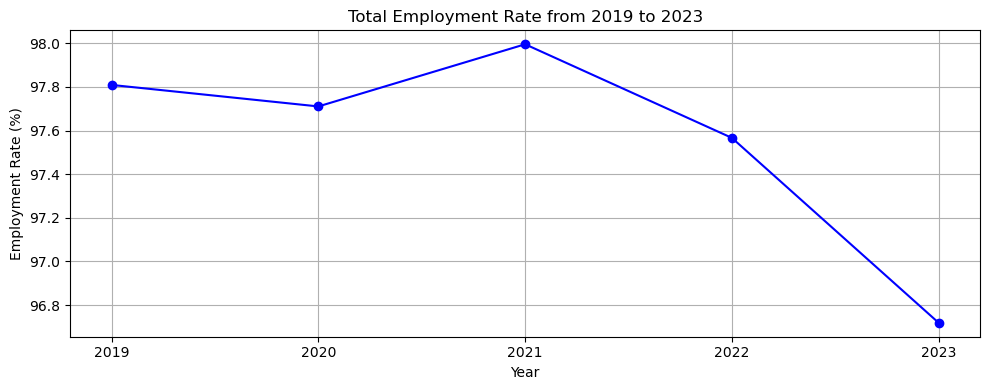

In [46]:
# visualize

plt.figure(figsize=(10, 4))
plt.plot(employment_rates_df['Year'], employment_rates_df['Employment Rate'], marker='o', linestyle='-', color='b')
plt.title('Total Employment Rate from 2019 to 2023')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.grid(True)
plt.xticks(employment_rates_df['Year'])  # Ensure we have a tick for every year
plt.tight_layout()
plt.show()


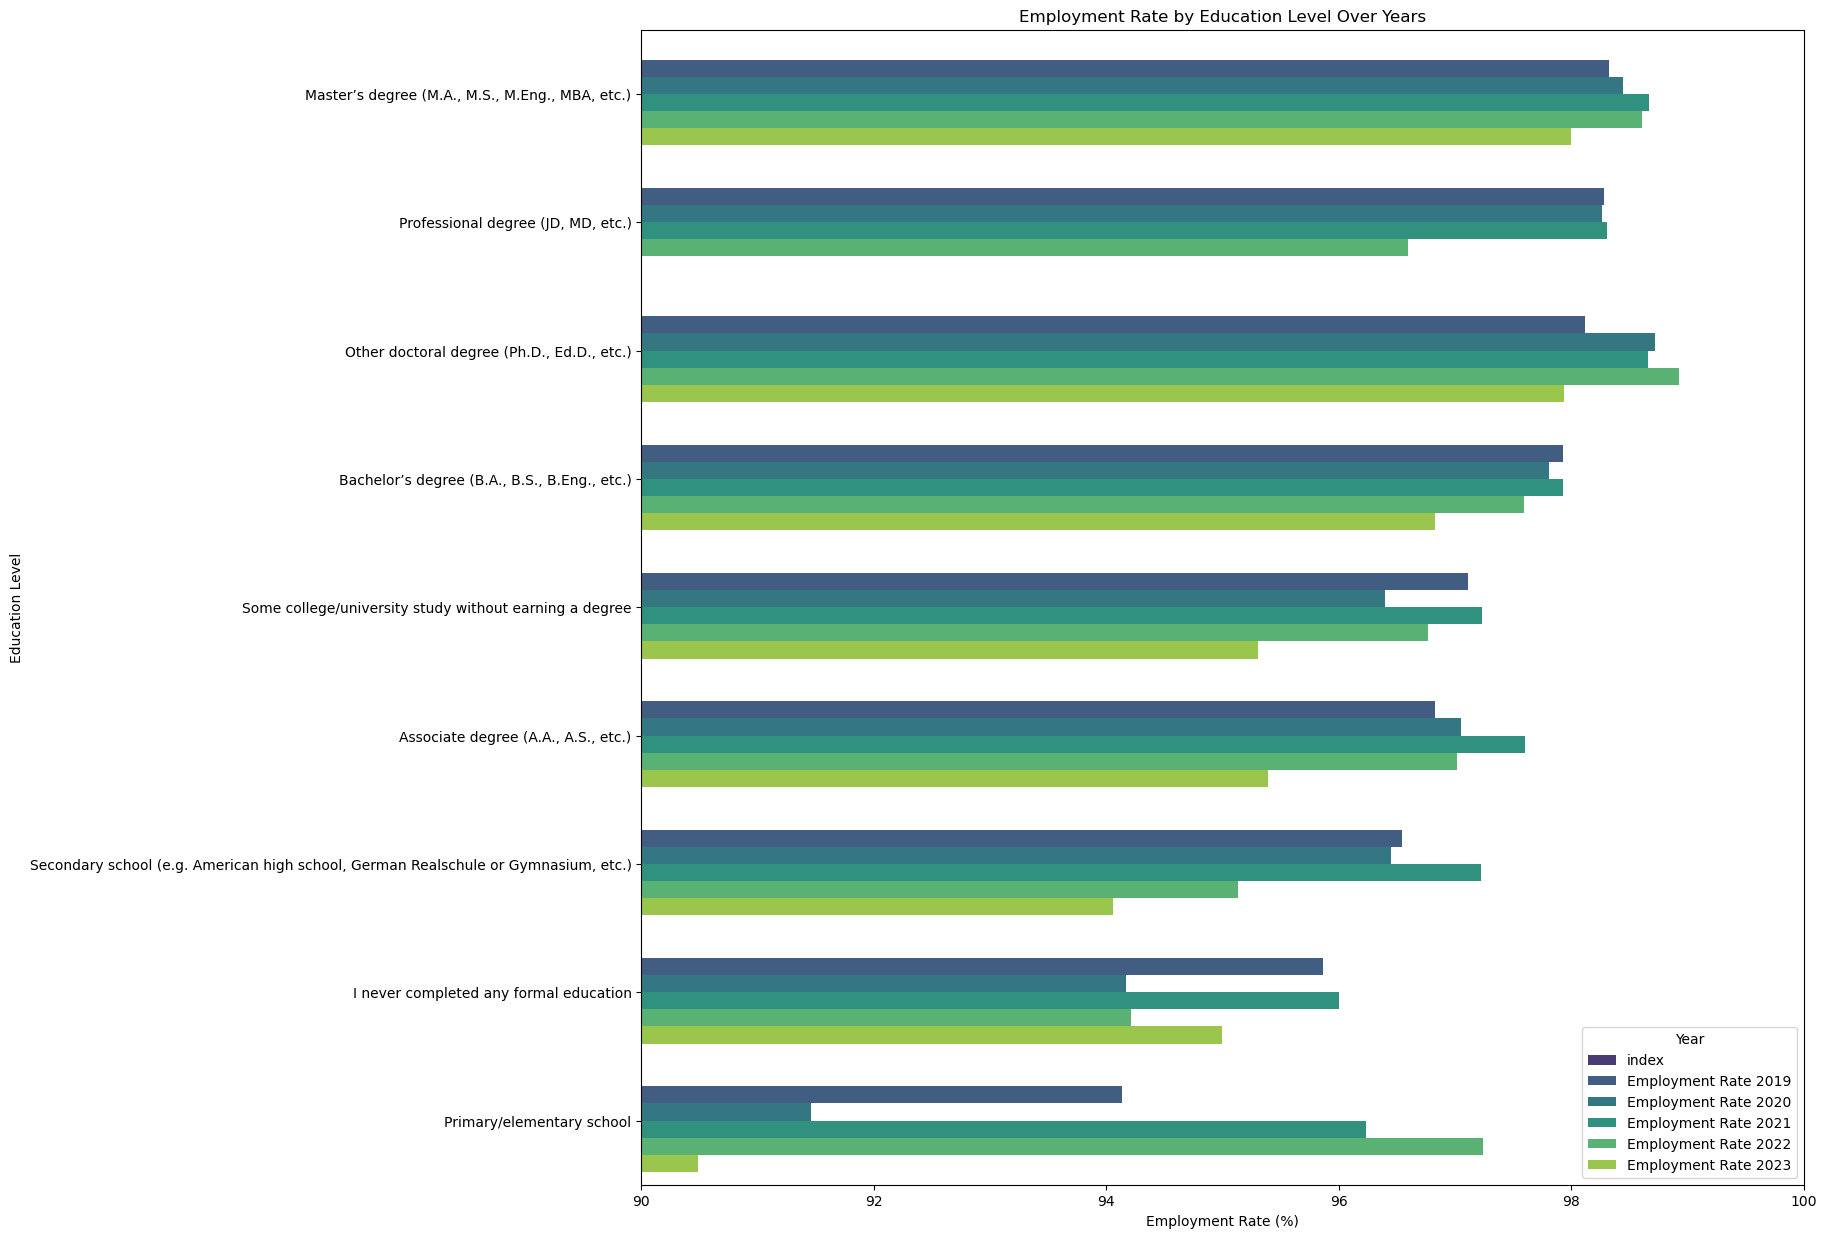

In [47]:
# Reset the index of the DataFrame so 'EdLevel' becomes a column
df_reset = all_years_employment_rate_sorted.reset_index()

# Now, use melt on the reset DataFrame
df_emp_melted = df_reset.melt(id_vars='EdLevel', var_name='Year', value_name='Value')

# Create a bar plot with gradient colors
plt.figure(figsize=(15, 15))
sns.barplot(data=df_emp_melted, y='EdLevel', x='Value', hue='Year', palette='viridis')

# Set the y-axis to start from 90% and end at 100% to zoom in on the differences
plt.xlim(90, 100)

# Set labels and title
plt.title('Employment Rate by Education Level Over Years')
plt.xlabel('Employment Rate (%)')
plt.ylabel('Education Level')

# Show plot
plt.show()

___
**Key insights:**

Question: **Is there correlation between education and integration into job market?**

Answer: **Yes**

* Higher Education Correlates with Higher Employment Rates: Individuals with higher educational qualifications, such as master's degrees, professional degrees, and doctoral degrees, tend to have higher employment rates. This trend is consistent across all the years presented.

* Stability Across Years: For the top level educations, the employment rates appear relatively stable across the years. There is a dip in every education level employment rate in the last 2 years, which also resonates with the general employment rate.

* Some College Education: Individuals who have some college/university study without earning a degree seem to have an employment rate comparable to those with bachelor's degrees. This suggests that even some higher education, short of a full degree, can be beneficial in finding employment. However majority of respondents have bachelor's degree, so some other factors, like transitioning from a non-developer role probably influence this as well.

* Primary and Secondary Education: Individuals with the least amount of formal education have the lowest employment rates compared to those with higher education. However, they do still maintain a consistent employment rate across the years, suggesting that there might be stable, if lower-tier, employment opportunities for these groups. 
___

**Other analysis ideas if time wasn't a constraint**
* Career Progression: How does education level affect career progression? Do individuals with higher education report higher job titles or more senior roles?
* Skillset and Tool Usage: What are the most common tools and technologies used by people with different education levels? Is there a skills gap between education levels?
* Transition to Tech from Other Fields: For individuals with a non-tech education background, how does the transition to the tech industry look?
* Impact of Certification and Training: Besides formal education, how do certifications and additional training affect employment opportunities and salary?us